# Demand prediction baseline solution

Victor Kantor, xead.wl@gmail.com

In [2]:
import pandas as pd

train = pd.read_csv("train.tsv")
test = pd.read_csv("test.tsv")
# sample_submission = pd.read_csv("sample_submission.tsv")

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import scipy.stats as sps

In [6]:
from sklearn.cross_validation import train_test_split

/Users/semenfedotov/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
from copy import deepcopy

In [8]:
import xgboost

In [9]:
import random

Посмотрим на данные, может мы можем найти еще какие-нибудь зависимости. Скорее всего нам не понадобятся данные, где shift != 1 ибо они являются неактуальными(признаки посчитаны с задержкой)

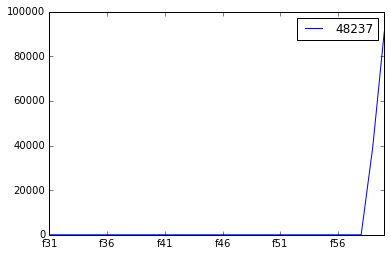

In [244]:
train[train.columns[-30:]].sample(1).T.plot()

In [185]:
train_upd = train.drop(train.columns[-30:], axis=1)

In [189]:
train_sh1 = train_upd[train_upd['shift'] == 1].drop('shift', axis=1)

Возьмем срез по какому-нибудь товару и посмотрим на его продажи

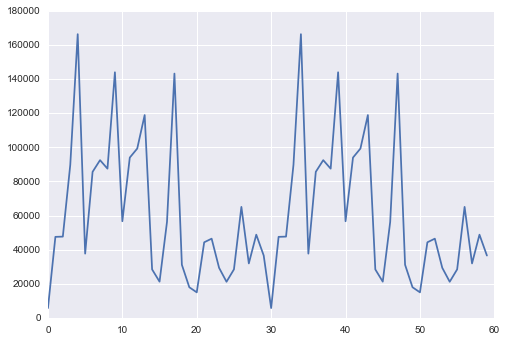

In [257]:
plt.plot(range(60), train.ix[2][-60:])

In [253]:
train_sh1.groupby('item_id')['week'].apply(len)

item_id
20427028    108
20427046    108
20427072     16
20427396    107
20427444     15
20427450    108
20427463    108
20427503    108
20427504    108
20427542    108
20427567    108
20427568    108
20427583    108
20427619    108
20433396      6
20433851    108
20433852    107
20435813    108
20435814    108
20435815    108
20437661    108
20437662    108
20437675    108
20437676    108
20437695      2
20437923    108
20437924    108
20437925    108
20438091     32
20438332    108
           ... 
20450671    108
20450803     21
20450856    108
20450857    108
20450858    108
20451022     26
20451023     24
20451039     24
20451040     23
20451161     20
20451471     19
20451604    108
20451671     13
20451673     12
20451681     11
20451994    108
20452269     76
20452270     76
20452327    108
20452328    108
20452902    108
20452992    108
20453273    108
20453275    108
20453305    108
20453306    108
20453393    108
20453396    108
20453486    108
20453563    108
Name: week, dtyp

In [265]:
(1320.0 + 24022.) / (820.0 + 14921.0)

1.6099358363509306

In [267]:
(820.0 + 14921.0) * 1.609

25327.269

In [261]:
1320. / 820

1.6097560975609757

In [266]:
24022.0 / 14921.0

1.6099457140942297

In [272]:
(820.0 + 14921.0 + 28149.0 + 80383.0 )* 1.6095

200017.3935

In [273]:
1320.0+24022.0+45319.0+129416.0

200077.0

In [274]:
80383.0 * 1.6

128612.8

In [302]:
train_sh1

,Num,y,year,week,item_id,f1,f2,f3,f4,f5,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,0,123438,2012,52,20442076,4915.0,38056.0,40185.0,45733.0,59710.0,...,39423.0,41765.0,52590.0,31452.0,44420.0,41865.0,52705.0,36102.0,44163.0,45239.0
1,1,58410,2012,52,20441997,2230.0,18817.0,20110.0,26368.0,31412.0,...,22830.0,25230.0,27850.0,21390.0,27090.0,23170.0,29705.0,19140.0,22055.0,23200.0
2,2,163930,2012,52,20441990,5695.0,47480.0,47619.0,89708.0,166338.0,...,14930.0,44290.0,46412.0,29320.0,21140.0,28406.0,65056.0,31886.0,48750.0,36520.0
3,3,53902,2012,52,20441989,1995.0,17146.0,20066.0,27070.0,35337.0,...,15120.0,12480.0,19780.0,7990.0,8230.0,10650.0,21920.0,13040.0,9780.0,9630.0
4,4,105970,2012,52,20441988,6515.0,49262.0,50045.0,95167.0,102390.0,...,18872.0,19328.0,37168.0,13570.0,19760.0,20208.0,34745.0,18442.0,24700.0,21793.0
5,5,21171,2012,52,20441953,445.0,3020.0,2395.0,4015.0,5780.0,...,8796.0,7690.0,13448.0,3455.0,7205.0,8490.0,10790.0,7855.0,8150.0,7505.0
6,6,63128,2012,52,20441952,445.0,3930.0,4260.0,6836.0,12175.0,...,11754.0,8064.0,15275.0,4991.0,9025.0,12236.0,19830.0,8465.0,10770.0,13145.0
7,7,44001,2012,52,20441951,1167.0,15220.0,12310.0,17270.0,20750.0,...,21102.0,20376.0,25385.0,11685.0,21389.0,16685.0,22805.0,14495.0,16462.0,19383.0
8,8,53202,2012,52,20441790,1640.0,22010.0,17716.0,21941.0,28430.0,...,18301.0,17758.0,26181.0,11090.0,17705.0,17225.0,23385.0,13711.0,17175.0,22406.0
9,9,36627,2012,52,20441789,1440.0,14601.0,12127.0,17498.0,22130.0,...,13531.0,15015.0,18574.0,9146.0,14865.0,13051.0,17389.0,10739.0,13260.0,15570.0


In [300]:
droped_test = test[test['shift']==1][test.columns[:-30]].drop(['shift'], axis=1)
droped_test.head()

,Num,year,week,item_id,f1,f2,f3,f4,f5,f6,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
678,350191,2015,3,20447918,1128.0,1801.0,1045.0,1190.0,1310.0,1111.0,...,969.0,1635.0,895.0,2140.0,1182.0,1020.0,1293.0,1290.0,422.0,1690.0
679,350192,2015,3,20447902,11595.0,9685.0,12917.0,11157.0,12105.0,11765.0,...,21195.0,18280.0,18270.0,15851.0,16920.0,18320.0,24116.0,21307.0,6661.0,20610.0
680,350193,2015,3,20447732,176065.0,143105.0,202069.0,216920.0,236053.0,257198.0,...,221622.0,256605.0,240047.0,236630.0,206697.0,245652.0,286179.0,285904.0,54846.0,171320.0
681,350194,2015,3,20443951,27068.0,20460.0,25580.0,27135.0,24059.0,27335.0,...,22450.0,22093.0,31175.0,23355.0,15358.0,18930.0,29643.0,33970.0,7787.0,20395.0
682,350195,2015,3,20443944,3310.0,1853.0,2836.0,2807.0,2550.0,3951.0,...,60.0,30.0,50.0,20.0,20.0,30.0,0.0,0.0,0.0,10.0


In [301]:
droped_test[droped_test.item_id == 20443951].drop(['Num','item_id'],axis=1).T

,681,1352,1802
year,2015.0,2015.0,2015.0
week,3.0,4.0,5.0
f1,27068.0,20460.0,25580.0
f2,20460.0,25580.0,27135.0
f3,25580.0,27135.0,24059.0
f4,27135.0,24059.0,27335.0
f5,24059.0,27335.0,23271.0
f6,27335.0,23271.0,28080.0
f7,23271.0,28080.0,24920.0
f8,28080.0,24920.0,29302.0


In [290]:
test[test['shift']==1].drop(['shift'], axis=1)[test.item_id == 20447902]

/Users/semenfedotov/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,Num,year,week,item_id,f1,f2,f3,f4,f5,f6,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
679,350192,2015,3,20447902,11595.0,9685.0,12917.0,11157.0,12105.0,11765.0,...,21195.0,18280.0,18270.0,15851.0,16920.0,18320.0,24116.0,21307.0,6661.0,20610.0
1350,350863,2015,4,20447902,9685.0,12917.0,11157.0,12105.0,11765.0,10823.0,...,18280.0,18270.0,15851.0,16920.0,18320.0,24116.0,21307.0,6661.0,20610.0,16791.0
1800,351313,2015,5,20447902,12917.0,11157.0,12105.0,11765.0,10823.0,11310.0,...,18270.0,15851.0,16920.0,18320.0,24116.0,21307.0,6661.0,20610.0,16791.0,20795.0


In [285]:
test[test.item_id == 20447918 & (test.shift == 1)][test.columns[:-30]].T

,0,226,466,678,918,1133,1364,1579,1799
Num,348622.0,349519.0,349759.0,350191.0,350431.0,350646.0,350877.0,351092.0,351312.0
year,2015.0,2015.0,2015.0,2015.0,2015.0,2015.0,2015.0,2015.0,2015.0
week,3.0,3.0,4.0,3.0,4.0,5.0,4.0,5.0,5.0
shift,3.0,2.0,3.0,1.0,2.0,3.0,1.0,2.0,1.0
item_id,20447918.0,20447918.0,20447918.0,20447918.0,20447918.0,20447918.0,20447918.0,20447918.0,20447918.0
f1,960.0,820.0,820.0,1128.0,1128.0,1128.0,1801.0,1801.0,1045.0
f2,820.0,1128.0,1128.0,1801.0,1801.0,1801.0,1045.0,1045.0,1190.0
f3,1128.0,1801.0,1801.0,1045.0,1045.0,1045.0,1190.0,1190.0,1310.0
f4,1801.0,1045.0,1045.0,1190.0,1190.0,1190.0,1310.0,1310.0,1111.0
f5,1045.0,1190.0,1190.0,1310.0,1310.0,1310.0,1111.0,1111.0,870.0


In [260]:
train_sh1[train_sh1.item_id == 20451671].drop(['Num', 'item_id'],axis=1).T

,64344,65031,65720,66410,67098,67786,68471,69155,69835,70509,71180,71849,72299
y,1320.0,24022.0,45319.0,129416.0,166436.0,139810.0,202248.0,113363.0,132569.0,230658.0,222151.0,35307.0,108625.0
year,2014.0,2014.0,2014.0,2014.0,2014.0,2014.0,2014.0,2014.0,2014.0,2014.0,2014.0,2015.0,2015.0
week,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,1.0,2.0
f1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [303]:
14921.0 * 1.609

24007.889

In [275]:
103377.0 * 1.6091

166343.9307

В качестве модели использовать будем xgboost, но он по дефолту оптимизирует mse, а мы хотим smape, т.е. перед тем, как его запускать, нужно будет преобразовать таргет

In [251]:
# info_20450441[list(info_20450441.columns[-30:]) + ['week', 'y']].T

In [220]:
info_20449357.f1.mean()

30985.8

In [219]:
info_20449357.y.mean()

99106.18666666666

In [153]:
# cur_elem = random.choice(new_train.item_id)

# params = {"objective": "reg:linear", "booster":"gbtree"}

# algo = xgboost.train(dtrain=xgboost.DMatrix(new_train[new_train.item_id == cur_elem].drop(['y','Num','year','item_id'],axis=1),
#                                             new_train[new_train.item_id == cur_elem]['y']), params=params)

# prd = algo.predict(xgboost.DMatrix(new_test[new_test.item_id == cur_elem].drop(['y','Num', 'year','item_id'], axis=1)) )

# act = new_test[new_test.item_id == cur_elem]['y']

# print(get_smape(act, prd))

In [10]:
from tqdm import tqdm

In [155]:
# xgboosts = []
# real_ans = []
# my_ans = []
# for itemid in tqdm(np.unique(new_train.item_id)):
#     algo = xgboost.train(dtrain=xgboost.DMatrix(new_train[new_train.item_id == itemid].drop(['y','Num','year','item_id'],axis=1),
#                                             new_train[new_train.item_id == itemid]['y']), params=params)

#     prd = algo.predict(xgboost.DMatrix(new_test[new_test.item_id == itemid].drop(['y','Num', 'year','item_id'], axis=1)) )

#     act = new_test[new_test.item_id == itemid]['y']
    
#     real_ans += list(act)
#     my_ans += list(prd)

# real_ans = np.array(real_ans)
# my_ans = np.array(my_ans)

In [ ]:
future = deepcopy(train[train.columns[:-30]])
future = future[future['shift'] == 1]
future.index = future.week

In [77]:
future.drop(['Num','item_id','shift', 'year', 'week'], axis=1)[future.item_id == 20442119].T

NameError: name 'future' is not defined

In [78]:
future.drop(['y','Num','item_id','shift', 'year', 'week'], axis=1)[future.item_id == 20442119].sample(1).T.plot()

NameError: name 'future' is not defined

In [79]:
future.drop(['y','Num','item_id', 'year', 'week'], axis=1)[(future.week == 1) & (future['shift'] == 1)].sample(2).T.plot()

NameError: name 'future' is not defined

In [80]:
future.drop(['Num','shift','item_id'], axis=1).head(10).T.plot()

NameError: name 'future' is not defined

In [81]:
daframe.drop(['Num','shift','item_id'], axis=1).tail(12).T

NameError: name 'daframe' is not defined

In [17]:
import seaborn as sns

In [305]:
droped_test[droped_test.item_id == 20438733]

,Num,year,week,item_id,f1,f2,f3,f4,f5,f6,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
900,350413,2015,3,20438733,5595.0,4692.0,4753.0,5472.0,6372.0,6573.0,...,2827.0,3108.0,3693.0,3467.0,2941.0,3757.0,6767.0,4491.0,515.0,2597.0
1575,351088,2015,4,20438733,4692.0,4753.0,5472.0,6372.0,6573.0,3612.0,...,3108.0,3693.0,3467.0,2941.0,3757.0,6767.0,4491.0,515.0,2597.0,3981.0
2015,351528,2015,5,20438733,4753.0,5472.0,6372.0,6573.0,3612.0,5764.0,...,3693.0,3467.0,2941.0,3757.0,6767.0,4491.0,515.0,2597.0,3981.0,4489.0


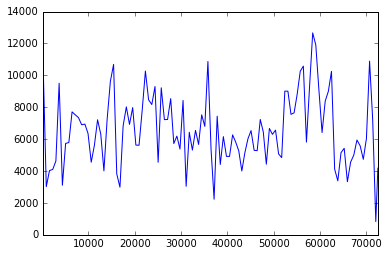

In [308]:
train_sh1[train_sh1.item_id == 20438733]['y'].plot()

In [329]:
new_test

,Num,y,year,week,shift,item_id,f1,f2,f3,f4,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
49278,243748,468109,2014,22,3,20443056,340780.0,326250.0,465626.0,190410.0,...,255775.0,216566.0,264235.0,240747.0,238698.0,252048.0,249950.0,264010.0,314314.0,271369.0
49279,243749,70550,2014,22,3,20443055,42720.0,43275.0,55306.0,27074.0,...,39045.0,35510.0,52557.0,47979.0,40749.0,42867.0,38264.0,43705.0,48630.0,44136.0
49280,243750,2212975,2014,22,3,20443043,1590472.0,1494215.0,2005927.0,837319.0,...,1221538.0,1024867.0,1274825.0,1195978.0,1091094.0,1209100.0,1155014.0,1264807.0,1556193.0,1237655.0
49281,243751,33327,2014,22,3,20443031,20340.0,22040.0,25930.0,14270.0,...,21065.0,17560.0,19830.0,22340.0,16100.0,17400.0,18315.0,21825.0,20860.0,20610.0
49282,243752,496837,2014,22,3,20442694,263343.0,282288.0,345854.0,148019.0,...,202973.0,179403.0,253711.0,250609.0,249770.0,243944.0,277207.0,311077.0,311287.0,298858.0
49283,243753,3075848,2014,22,3,20442693,1553776.0,1590236.0,2014712.0,921487.0,...,1248625.0,1175830.0,1572305.0,1579349.0,1658225.0,1817695.0,1856157.0,1935309.0,1988364.0,1959835.0
49284,243754,3268,2014,22,3,20442316,620.0,495.0,950.0,205.0,...,545.0,440.0,290.0,470.0,615.0,595.0,575.0,435.0,820.0,525.0
49285,243755,2753,2014,22,3,20442315,310.0,345.0,665.0,60.0,...,185.0,120.0,155.0,335.0,285.0,240.0,180.0,335.0,520.0,240.0
49286,243756,32,2014,22,3,20442216,3550.0,4140.0,4230.0,1550.0,...,540.0,560.0,570.0,210.0,150.0,114.0,70.0,40.0,30.0,0.0
49287,243757,112,2014,22,3,20442215,43450.0,21642.0,58306.0,17260.0,...,92.0,100.0,30.0,50.0,0.0,10.0,30.0,50.0,0.0,40.0


In [332]:
from tqdm import tqdm

In [333]:
itid = 20443055

In [334]:
new_test[new_test.item_id == itid]

,Num,y,year,week,shift,item_id,f1,f2,f3,f4,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
49279,243749,70550,2014,22,3,20443055,42720.0,43275.0,55306.0,27074.0,...,39045.0,35510.0,52557.0,47979.0,40749.0,42867.0,38264.0,43705.0,48630.0,44136.0
49721,246860,70550,2014,22,2,20443055,43275.0,55306.0,27074.0,45753.0,...,35510.0,52557.0,47979.0,40749.0,42867.0,38264.0,43705.0,48630.0,44136.0,39680.0
49944,247083,73688,2014,23,3,20443055,43275.0,55306.0,27074.0,45753.0,...,35510.0,52557.0,47979.0,40749.0,42867.0,38264.0,43705.0,48630.0,44136.0,39680.0
50164,249975,70550,2014,22,1,20443055,55306.0,27074.0,45753.0,40903.0,...,52557.0,47979.0,40749.0,42867.0,38264.0,43705.0,48630.0,44136.0,39680.0,45775.0
50387,250198,73688,2014,23,2,20443055,55306.0,27074.0,45753.0,40903.0,...,52557.0,47979.0,40749.0,42867.0,38264.0,43705.0,48630.0,44136.0,39680.0,45775.0
50610,250421,64343,2014,24,3,20443055,55306.0,27074.0,45753.0,40903.0,...,52557.0,47979.0,40749.0,42867.0,38264.0,43705.0,48630.0,44136.0,39680.0,45775.0
50827,253316,73688,2014,23,1,20443055,27074.0,45753.0,40903.0,50248.0,...,47979.0,40749.0,42867.0,38264.0,43705.0,48630.0,44136.0,39680.0,45775.0,43820.0
51050,253539,64343,2014,24,2,20443055,27074.0,45753.0,40903.0,50248.0,...,47979.0,40749.0,42867.0,38264.0,43705.0,48630.0,44136.0,39680.0,45775.0,43820.0
51268,253757,83872,2014,25,3,20443055,27074.0,45753.0,40903.0,50248.0,...,47979.0,40749.0,42867.0,38264.0,43705.0,48630.0,44136.0,39680.0,45775.0,43820.0
51494,256662,64343,2014,24,1,20443055,45753.0,40903.0,50248.0,37361.0,...,40749.0,42867.0,38264.0,43705.0,48630.0,44136.0,39680.0,45775.0,43820.0,45769.0


In [ ]:
get_last_info

In [ ]:
for item_id in np.unique(new_test.item_id):
    item_data = new_train[new_train.item_id == item_id]

In [ ]:
new_new_test = new_test[new_test]

In [335]:
test

,Num,year,week,shift,item_id,f1,f2,f3,f4,f5,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
0,348622,2015,3,3,20447918,960.0,820.0,1128.0,1801.0,1045.0,...,1510.0,580.0,969.0,1635.0,895.0,2140.0,1182.0,1020.0,1293.0,1290.0
1,348623,2015,3,3,20447902,9086.0,12585.0,11595.0,9685.0,12917.0,...,22055.0,14235.0,21195.0,18280.0,18270.0,15851.0,16920.0,18320.0,24116.0,21307.0
2,348624,2015,3,3,20447732,115087.0,147287.0,176065.0,143105.0,202069.0,...,302165.0,162232.0,221622.0,256605.0,240047.0,236630.0,206697.0,245652.0,286179.0,285904.0
3,348625,2015,3,3,20443951,20900.0,24420.0,27068.0,20460.0,25580.0,...,39055.0,14445.0,22450.0,22093.0,31175.0,23355.0,15358.0,18930.0,29643.0,33970.0
4,348626,2015,3,3,20443944,4430.0,5864.0,3310.0,1853.0,2836.0,...,120.0,130.0,60.0,30.0,50.0,20.0,20.0,30.0,0.0,0.0
5,348627,2015,3,3,20443943,57289.0,80036.0,112511.0,116002.0,171900.0,...,122340.0,50368.0,94634.0,91999.0,119165.0,96190.0,88666.0,118744.0,132368.0,117730.0
6,348628,2015,3,3,20443941,21868.0,30620.0,45886.0,49732.0,75195.0,...,77370.0,40930.0,63143.0,61417.0,63957.0,43027.0,53260.0,58029.0,62126.0,71857.0
7,348629,2015,3,3,20443902,41105.0,57637.0,54540.0,68171.0,64825.0,...,102330.0,36506.0,43432.0,52948.0,57199.0,60984.0,44887.0,58033.0,98839.0,76432.0
8,348630,2015,3,3,20443901,39381.0,56933.0,59899.0,67243.0,58880.0,...,106168.0,37908.0,45296.0,53534.0,58892.0,61250.0,54951.0,62347.0,106921.0,84194.0
9,348631,2015,3,3,20443308,5922.0,16070.0,14665.0,10640.0,20150.0,...,4081.0,1660.0,1610.0,2190.0,1464.0,1720.0,20460.0,1650.0,2568.0,1902.0


In [337]:
known_answers = []

In [346]:
it_data = test[test.item_id == 20447902]
it_data.drop(it_data.columns[-30:],axis=1, inplace=True)

/Users/semenfedotov/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [348]:
it_data

,Num,year,week,shift,item_id,f1,f2,f3,f4,f5,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
1,348623,2015,3,3,20447902,9086.0,12585.0,11595.0,9685.0,12917.0,...,22055.0,14235.0,21195.0,18280.0,18270.0,15851.0,16920.0,18320.0,24116.0,21307.0
227,349520,2015,3,2,20447902,12585.0,11595.0,9685.0,12917.0,11157.0,...,14235.0,21195.0,18280.0,18270.0,15851.0,16920.0,18320.0,24116.0,21307.0,6661.0
452,349745,2015,4,3,20447902,12585.0,11595.0,9685.0,12917.0,11157.0,...,14235.0,21195.0,18280.0,18270.0,15851.0,16920.0,18320.0,24116.0,21307.0,6661.0
679,350192,2015,3,1,20447902,11595.0,9685.0,12917.0,11157.0,12105.0,...,21195.0,18280.0,18270.0,15851.0,16920.0,18320.0,24116.0,21307.0,6661.0,20610.0
904,350417,2015,4,2,20447902,11595.0,9685.0,12917.0,11157.0,12105.0,...,21195.0,18280.0,18270.0,15851.0,16920.0,18320.0,24116.0,21307.0,6661.0,20610.0
1134,350647,2015,5,3,20447902,11595.0,9685.0,12917.0,11157.0,12105.0,...,21195.0,18280.0,18270.0,15851.0,16920.0,18320.0,24116.0,21307.0,6661.0,20610.0
1350,350863,2015,4,1,20447902,9685.0,12917.0,11157.0,12105.0,11765.0,...,18280.0,18270.0,15851.0,16920.0,18320.0,24116.0,21307.0,6661.0,20610.0,16791.0
1580,351093,2015,5,2,20447902,9685.0,12917.0,11157.0,12105.0,11765.0,...,18280.0,18270.0,15851.0,16920.0,18320.0,24116.0,21307.0,6661.0,20610.0,16791.0
1800,351313,2015,5,1,20447902,12917.0,11157.0,12105.0,11765.0,10823.0,...,18270.0,15851.0,16920.0,18320.0,24116.0,21307.0,6661.0,20610.0,16791.0,20795.0


In [351]:
it_data[(it_data['week'] == 5) & (it_data['shift'] == 1)][['week'] + list(it_data.columns[-30:])].values

array([[  5.00000000e+00,   1.29170000e+04,   1.11570000e+04,
          1.21050000e+04,   1.17650000e+04,   1.08230000e+04,
          1.13100000e+04,   1.19150000e+04,   1.26150000e+04,
          1.34750000e+04,   1.67440000e+04,   1.41000000e+04,
          1.58650000e+04,   1.93930000e+04,   1.61700000e+04,
          1.50600000e+04,   1.83400000e+04,   2.20550000e+04,
          1.42350000e+04,   2.11950000e+04,   1.82800000e+04,
          1.82700000e+04,   1.58510000e+04,   1.69200000e+04,
          1.83200000e+04,   2.41160000e+04,   2.13070000e+04,
          6.66100000e+03,   2.06100000e+04,   1.67910000e+04,
          2.07950000e+04]])

In [353]:
test

,Num,year,week,shift,item_id,f1,f2,f3,f4,f5,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
0,348622,2015,3,3,20447918,960.0,820.0,1128.0,1801.0,1045.0,...,1510.0,580.0,969.0,1635.0,895.0,2140.0,1182.0,1020.0,1293.0,1290.0
1,348623,2015,3,3,20447902,9086.0,12585.0,11595.0,9685.0,12917.0,...,22055.0,14235.0,21195.0,18280.0,18270.0,15851.0,16920.0,18320.0,24116.0,21307.0
2,348624,2015,3,3,20447732,115087.0,147287.0,176065.0,143105.0,202069.0,...,302165.0,162232.0,221622.0,256605.0,240047.0,236630.0,206697.0,245652.0,286179.0,285904.0
3,348625,2015,3,3,20443951,20900.0,24420.0,27068.0,20460.0,25580.0,...,39055.0,14445.0,22450.0,22093.0,31175.0,23355.0,15358.0,18930.0,29643.0,33970.0
4,348626,2015,3,3,20443944,4430.0,5864.0,3310.0,1853.0,2836.0,...,120.0,130.0,60.0,30.0,50.0,20.0,20.0,30.0,0.0,0.0
5,348627,2015,3,3,20443943,57289.0,80036.0,112511.0,116002.0,171900.0,...,122340.0,50368.0,94634.0,91999.0,119165.0,96190.0,88666.0,118744.0,132368.0,117730.0
6,348628,2015,3,3,20443941,21868.0,30620.0,45886.0,49732.0,75195.0,...,77370.0,40930.0,63143.0,61417.0,63957.0,43027.0,53260.0,58029.0,62126.0,71857.0
7,348629,2015,3,3,20443902,41105.0,57637.0,54540.0,68171.0,64825.0,...,102330.0,36506.0,43432.0,52948.0,57199.0,60984.0,44887.0,58033.0,98839.0,76432.0
8,348630,2015,3,3,20443901,39381.0,56933.0,59899.0,67243.0,58880.0,...,106168.0,37908.0,45296.0,53534.0,58892.0,61250.0,54951.0,62347.0,106921.0,84194.0
9,348631,2015,3,3,20443308,5922.0,16070.0,14665.0,10640.0,20150.0,...,4081.0,1660.0,1610.0,2190.0,1464.0,1720.0,20460.0,1650.0,2568.0,1902.0


In [19]:
from tqdm import tqdm

In [11]:
top_data_for_item = {}
for item_id in tqdm(np.unique(test.item_id)):
    item_data = test.drop(test.columns[-30:], axis=1)[test.item_id == item_id]
    best_week = item_data['week'].max()
    best_data = item_data[(item_data['week'] == best_week) & (item_data['shift'] == 1)][['week'] + list(item_data.columns[-30:])].values[0]
    top_data_for_item[item_id] = best_data

100%|██████████| 227/227 [00:01<00:00, 217.17it/s]


In [12]:
print(test.columns)

Index([u'Num', u'year', u'week', u'shift', u'item_id', u'f1', u'f2', u'f3',
       u'f4', u'f5', u'f6', u'f7', u'f8', u'f9', u'f10', u'f11', u'f12',
       u'f13', u'f14', u'f15', u'f16', u'f17', u'f18', u'f19', u'f20', u'f21',
       u'f22', u'f23', u'f24', u'f25', u'f26', u'f27', u'f28', u'f29', u'f30',
       u'f31', u'f32', u'f33', u'f34', u'f35', u'f36', u'f37', u'f38', u'f39',
       u'f40', u'f41', u'f42', u'f43', u'f44', u'f45', u'f46', u'f47', u'f48',
       u'f49', u'f50', u'f51', u'f52', u'f53', u'f54', u'f55', u'f56', u'f57',
       u'f58', u'f59', u'f60'],
      dtype='object')


In [13]:
test.week = test.week.apply(float)

In [14]:
# BAGA , A NET

answers = []
for element in tqdm(test.values):
    best_cur_data = top_data_for_item[element[4]]
    if element[2] < best_cur_data[0]:
        week_diff = element[2] - best_cur_data[0] 
        answers.append((element[0], best_cur_data[week_diff] * 1.6091))
    else:
        answers.append((element[0], np.nan))

100%|██████████| 2016/2016 [00:00<00:00, 172189.64it/s]


In [15]:
answers = np.array(answers)

In [16]:
len(answers)

2016

In [17]:
need_prediction = answers[np.isnan(answers[:,1])]
need_prediction

array([[ 349748.,      nan],
       [ 349900.,      nan],
       [ 349901.,      nan],
       ..., 
       [ 351526.,      nan],
       [ 351527.,      nan],
       [ 351528.,      nan]])

In [18]:
np.sum(np.isnan(answers[:,1]))

681

In [396]:
new_test = test[test.Num.isin(need_prediction[:,0])]

In [397]:
newest_test = new_test[new_test['shift'] == 1].drop(new_test.columns[-30:], axis=1).drop('shift', axis=1)

In [398]:
newest_test

,Num,year,week,item_id,f1,f2,f3,f4,f5,f6,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
1353,350866,2015,4.0,20443944,1853.0,2836.0,2807.0,2550.0,3951.0,3398.0,...,30.0,50.0,20.0,20.0,30.0,0.0,0.0,0.0,10.0,10.0
1505,351018,2015,4.0,20433851,200.0,380.0,150.0,230.0,220.0,210.0,...,20.0,80.0,50.0,30.0,80.0,270.0,130.0,30.0,70.0,120.0
1506,351019,2015,4.0,20427396,170.0,380.0,280.0,230.0,80.0,50.0,...,100.0,20.0,20.0,20.0,110.0,330.0,290.0,160.0,0.0,90.0
1523,351036,2015,4.0,20439005,29.0,20.0,20.0,0.0,105.0,30.0,...,20.0,0.0,10.0,15.0,0.0,30.0,5.0,0.0,15.0,20.0
1524,351037,2015,4.0,20439124,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1551,351064,2015,4.0,20438687,16860.0,17080.0,16750.0,16190.0,17765.0,15327.0,...,1560.0,1190.0,280.0,250.0,90.0,40.0,40.0,0.0,40.0,120.0
1552,351065,2015,4.0,20438688,22213.0,23991.0,18690.0,20385.0,20875.0,23756.0,...,470.0,100.0,100.0,40.0,50.0,0.0,0.0,0.0,20.0,160.0
1796,351309,2015,5.0,20447972,191280.0,164860.0,215995.0,236650.0,169852.0,175130.0,...,124030.0,114320.0,125180.0,130750.0,171420.0,125780.0,38247.0,121600.0,111050.0,151326.0
1797,351310,2015,5.0,20443057,57467.0,57560.0,59995.0,60706.0,60859.0,58645.0,...,41020.0,37525.0,34888.0,41300.0,47174.0,50700.0,10225.0,36755.0,34160.0,38721.0
1798,351311,2015,5.0,20447919,1830.0,2030.0,2000.0,2401.0,1400.0,1640.0,...,1769.0,2330.0,1269.0,1010.0,2193.0,1810.0,424.0,1359.0,1210.0,1180.0


In [399]:
newest_train = train[train['shift'] == 1].drop(train.columns[-30:], axis=1).drop('shift', axis=1)

In [400]:
newest_test

,Num,year,week,item_id,f1,f2,f3,f4,f5,f6,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
1353,350866,2015,4.0,20443944,1853.0,2836.0,2807.0,2550.0,3951.0,3398.0,...,30.0,50.0,20.0,20.0,30.0,0.0,0.0,0.0,10.0,10.0
1505,351018,2015,4.0,20433851,200.0,380.0,150.0,230.0,220.0,210.0,...,20.0,80.0,50.0,30.0,80.0,270.0,130.0,30.0,70.0,120.0
1506,351019,2015,4.0,20427396,170.0,380.0,280.0,230.0,80.0,50.0,...,100.0,20.0,20.0,20.0,110.0,330.0,290.0,160.0,0.0,90.0
1523,351036,2015,4.0,20439005,29.0,20.0,20.0,0.0,105.0,30.0,...,20.0,0.0,10.0,15.0,0.0,30.0,5.0,0.0,15.0,20.0
1524,351037,2015,4.0,20439124,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1551,351064,2015,4.0,20438687,16860.0,17080.0,16750.0,16190.0,17765.0,15327.0,...,1560.0,1190.0,280.0,250.0,90.0,40.0,40.0,0.0,40.0,120.0
1552,351065,2015,4.0,20438688,22213.0,23991.0,18690.0,20385.0,20875.0,23756.0,...,470.0,100.0,100.0,40.0,50.0,0.0,0.0,0.0,20.0,160.0
1796,351309,2015,5.0,20447972,191280.0,164860.0,215995.0,236650.0,169852.0,175130.0,...,124030.0,114320.0,125180.0,130750.0,171420.0,125780.0,38247.0,121600.0,111050.0,151326.0
1797,351310,2015,5.0,20443057,57467.0,57560.0,59995.0,60706.0,60859.0,58645.0,...,41020.0,37525.0,34888.0,41300.0,47174.0,50700.0,10225.0,36755.0,34160.0,38721.0
1798,351311,2015,5.0,20447919,1830.0,2030.0,2000.0,2401.0,1400.0,1640.0,...,1769.0,2330.0,1269.0,1010.0,2193.0,1810.0,424.0,1359.0,1210.0,1180.0


In [401]:
to_append = test[~test.Num.isin(need_prediction[:,0])]

In [402]:
to_append= to_append[to_append['shift'] == 1].drop(to_append.columns[-30:], axis=1).drop('shift', axis=1)

In [403]:
to_append

,Num,year,week,item_id,f1,f2,f3,f4,f5,f6,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
678,350191,2015,3.0,20447918,1128.0,1801.0,1045.0,1190.0,1310.0,1111.0,...,969.0,1635.0,895.0,2140.0,1182.0,1020.0,1293.0,1290.0,422.0,1690.0
679,350192,2015,3.0,20447902,11595.0,9685.0,12917.0,11157.0,12105.0,11765.0,...,21195.0,18280.0,18270.0,15851.0,16920.0,18320.0,24116.0,21307.0,6661.0,20610.0
680,350193,2015,3.0,20447732,176065.0,143105.0,202069.0,216920.0,236053.0,257198.0,...,221622.0,256605.0,240047.0,236630.0,206697.0,245652.0,286179.0,285904.0,54846.0,171320.0
681,350194,2015,3.0,20443951,27068.0,20460.0,25580.0,27135.0,24059.0,27335.0,...,22450.0,22093.0,31175.0,23355.0,15358.0,18930.0,29643.0,33970.0,7787.0,20395.0
682,350195,2015,3.0,20443944,3310.0,1853.0,2836.0,2807.0,2550.0,3951.0,...,60.0,30.0,50.0,20.0,20.0,30.0,0.0,0.0,0.0,10.0
683,350196,2015,3.0,20443943,112511.0,116002.0,171900.0,213570.0,276095.0,223410.0,...,94634.0,91999.0,119165.0,96190.0,88666.0,118744.0,132368.0,117730.0,28229.0,87669.0
684,350197,2015,3.0,20443941,45886.0,49732.0,75195.0,79228.0,133537.0,110630.0,...,63143.0,61417.0,63957.0,43027.0,53260.0,58029.0,62126.0,71857.0,17621.0,54582.0
685,350198,2015,3.0,20443902,54540.0,68171.0,64825.0,49735.0,65186.0,91217.0,...,43432.0,52948.0,57199.0,60984.0,44887.0,58033.0,98839.0,76432.0,23853.0,46516.0
686,350199,2015,3.0,20443901,59899.0,67243.0,58880.0,54612.0,67293.0,79369.0,...,45296.0,53534.0,58892.0,61250.0,54951.0,62347.0,106921.0,84194.0,23840.0,48798.0
687,350200,2015,3.0,20443308,14665.0,10640.0,20150.0,18860.0,29670.0,27470.0,...,1610.0,2190.0,1464.0,1720.0,20460.0,1650.0,2568.0,1902.0,652.0,1618.0


In [404]:
answers

array([[ 348622.    ,    1496.463 ],
       [ 348623.    ,   27018.3981],
       [ 348624.    ,  297393.862 ],
       ..., 
       [ 351526.    ,          nan],
       [ 351527.    ,          nan],
       [ 351528.    ,          nan]])

In [405]:
to_append.Num

678     350191
679     350192
680     350193
681     350194
682     350195
683     350196
684     350197
685     350198
686     350199
687     350200
688     350201
689     350202
690     350203
691     350204
692     350205
693     350206
694     350207
695     350208
696     350209
697     350210
698     350211
699     350212
700     350213
701     350214
702     350215
703     350216
704     350217
705     350218
706     350219
707     350220
         ...  
1544    351057
1545    351058
1546    351059
1547    351060
1548    351061
1549    351062
1550    351063
1553    351066
1554    351067
1555    351068
1556    351069
1557    351070
1558    351071
1559    351072
1560    351073
1561    351074
1562    351075
1563    351076
1564    351077
1565    351078
1566    351079
1567    351080
1568    351081
1569    351082
1570    351083
1571    351084
1572    351085
1573    351086
1574    351087
1575    351088
Name: Num, dtype: int64

In [406]:
valls = []
for num in tqdm(to_append.Num):
    for i in range(len(answers)):
        if answers[i][0] == num:
            valls.append(answers[i][1])
            break

100%|██████████| 445/445 [00:00<00:00, 1146.40it/s]


In [407]:
valls

[1496.463,
 27018.398099999999,
 297393.86200000002,
 29454.575499999999,
 16.091000000000001,
 146160.98939999999,
 67698.055200000003,
 111879.1139,
 102573.68859999999,
 3540.02,
 1850.4649999999999,
 54966.856,
 278823.2389,
 21951.342199999999,
 1947.011,
 178690.55499999999,
 121551.414,
 509556.91519999999,
 510459.62030000001,
 2334.8040999999998,
 113163.17569999999,
 83422.180399999997,
 1214.8705,
 24218.5641,
 10943.489100000001,
 150428.32259999998,
 7485.5331999999999,
 18655.9054,
 5527.2584999999999,
 23589.405999999999,
 17167.4879,
 279809.61719999998,
 7393.8144999999995,
 21948.124,
 10435.013499999999,
 2469.9684999999999,
 44792.5167,
 1399.9169999999999,
 160.91,
 16829.5769,
 7055.9034999999994,
 18488.559000000001,
 1160902.8951000001,
 79864.460299999992,
 342908.86459999997,
 872928.70449999999,
 95982.815000000002,
 27094.025799999999,
 25970.874,
 96.545999999999992,
 47991.407500000001,
 88.500500000000002,
 257.45600000000002,
 2757435.8240999999,
 387056

In [408]:
to_append.insert(1, 'y', valls)

In [409]:
to_append

,Num,y,year,week,item_id,f1,f2,f3,f4,f5,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
678,350191,1496.4630,2015,3.0,20447918,1128.0,1801.0,1045.0,1190.0,1310.0,...,969.0,1635.0,895.0,2140.0,1182.0,1020.0,1293.0,1290.0,422.0,1690.0
679,350192,27018.3981,2015,3.0,20447902,11595.0,9685.0,12917.0,11157.0,12105.0,...,21195.0,18280.0,18270.0,15851.0,16920.0,18320.0,24116.0,21307.0,6661.0,20610.0
680,350193,297393.8620,2015,3.0,20447732,176065.0,143105.0,202069.0,216920.0,236053.0,...,221622.0,256605.0,240047.0,236630.0,206697.0,245652.0,286179.0,285904.0,54846.0,171320.0
681,350194,29454.5755,2015,3.0,20443951,27068.0,20460.0,25580.0,27135.0,24059.0,...,22450.0,22093.0,31175.0,23355.0,15358.0,18930.0,29643.0,33970.0,7787.0,20395.0
682,350195,16.0910,2015,3.0,20443944,3310.0,1853.0,2836.0,2807.0,2550.0,...,60.0,30.0,50.0,20.0,20.0,30.0,0.0,0.0,0.0,10.0
683,350196,146160.9894,2015,3.0,20443943,112511.0,116002.0,171900.0,213570.0,276095.0,...,94634.0,91999.0,119165.0,96190.0,88666.0,118744.0,132368.0,117730.0,28229.0,87669.0
684,350197,67698.0552,2015,3.0,20443941,45886.0,49732.0,75195.0,79228.0,133537.0,...,63143.0,61417.0,63957.0,43027.0,53260.0,58029.0,62126.0,71857.0,17621.0,54582.0
685,350198,111879.1139,2015,3.0,20443902,54540.0,68171.0,64825.0,49735.0,65186.0,...,43432.0,52948.0,57199.0,60984.0,44887.0,58033.0,98839.0,76432.0,23853.0,46516.0
686,350199,102573.6886,2015,3.0,20443901,59899.0,67243.0,58880.0,54612.0,67293.0,...,45296.0,53534.0,58892.0,61250.0,54951.0,62347.0,106921.0,84194.0,23840.0,48798.0
687,350200,3540.0200,2015,3.0,20443308,14665.0,10640.0,20150.0,18860.0,29670.0,...,1610.0,2190.0,1464.0,1720.0,20460.0,1650.0,2568.0,1902.0,652.0,1618.0


In [410]:
newest_train = newest_train.append(to_append)

In [411]:
newest_train['y'] = newest_train['y'].apply(lambda x: np.log(1 + x))
# newest_test['y'] = newest_test['y'].apply(lambda x: np.log(1 + x))

newest_train[newest_train.columns[-30:]]=newest_train[newest_train.columns[-30:]].apply(lambda x: np.log(1 + x))
newest_test[newest_test.columns[-30:]]=newest_test[newest_test.columns[-30:]].apply(lambda x: np.log(1 + x))

In [412]:
# algo_0 = KNeighborsRegressor()
# algo_0.fit(newest_train.drop(['y','Num', 'year'],axis=1),newest_train['y'])
# preds_tr_0 = algo_0.predict(newest_train.drop(['y','Num', 'year'],axis=1))
# preds_0 = algo_0.predict(newest_test.drop(['Num', 'year'], axis=1))

In [413]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [414]:
# newest_train.drop(newest_train.columns[-30:-15], axis=1, inplace=True)
# newest_test.drop(newest_test.columns[-30:-15], axis=1, inplace=True)

In [415]:
algo_1 = RandomForestRegressor(n_estimators=140, max_depth=15)
algo_1.fit(newest_train.drop(['y','Num', 'year'],axis=1),newest_train['y'])
preds_tr_1 = algo_1.predict(newest_train.drop(['y','Num', 'year'],axis=1))
preds_1 = algo_1.predict(newest_test.drop(['Num', 'year'], axis=1))

In [416]:
from sklearn.ensemble import GradientBoostingRegressor

In [491]:
algo_2 = GradientBoostingRegressor(max_depth=15, n_estimators=50)
algo_2.fit(newest_train.drop(['y','Num', 'year'],axis=1),newest_train['y'])
preds_tr_2 = algo_2.predict(newest_train.drop(['y','Num', 'year'],axis=1))
preds_2 = algo_2.predict(newest_test.drop(['Num', 'year'], axis=1))

In [490]:
algo_3 = ExtraTreesRegressor(n_estimators=140, max_depth=18)
algo_3.fit(newest_train.drop(['y','Num', 'year'],axis=1),newest_train['y'])
preds_tr_3 = algo_3.predict(newest_train.drop(['y','Num', 'year'],axis=1))
preds_3 = algo_3.predict(newest_test.drop(['Num', 'year'], axis=1))

In [419]:
from sklearn.ensemble import BaggingRegressor

In [420]:
algo_4 = BaggingRegressor(n_estimators=128)
algo_4.fit(newest_train.drop(['y','Num', 'year'],axis=1),newest_train['y'])
preds_tr_4 = algo_4.predict(newest_train.drop(['y','Num', 'year'],axis=1))
preds_4 = algo_4.predict(newest_test.drop(['Num', 'year'], axis=1))

In [421]:
from xgboost import XGBRegressor

In [422]:
algo = XGBRegressor(
 learning_rate =0.1,
 n_estimators=250,
 max_depth=20,
 min_child_weight=1,
 gamma=0,
 subsample=.98,
 colsample_bytree=0.75,
 nthread=4,
 scale_pos_weight=1)
    
    
    
    
    
    
    
    
    
#     max_depth=20, n_estimators=400,min_child_weight=5)
algo.fit(newest_train.drop(['y','Num', 'year'],axis=1),newest_train['y'])
algo_top_pred = algo.predict(newest_train.drop(['y','Num', 'year'],axis=1))
predictions_skl = algo.predict(newest_test.drop(['Num', 'year'], axis=1))



In [492]:
new_datafram = pd.DataFrame()

In [493]:
new_datafram[1] = np.exp(preds_tr_1) - 1
new_datafram[2] = np.exp(preds_tr_2) - 1
new_datafram[3] = np.exp(preds_tr_3) - 1
new_datafram[4] = np.exp(preds_tr_4) - 1
new_datafram[5] = np.exp(algo_top_pred) - 1
new_datafram['y'] = np.exp(newest_train['y'].values) - 1

In [494]:
from sklearn.linear_model import LinearRegression

In [495]:
new_datafram

,1,2,3,4,5,y
0,1.056932e+05,1.217580e+05,1.079998e+05,1.154394e+05,1.232742e+05,1.234380e+05
1,5.614680e+04,5.796863e+04,5.396705e+04,5.735411e+04,5.840495e+04,5.841000e+04
2,1.304778e+05,1.621818e+05,1.627292e+05,1.404815e+05,1.640301e+05,1.639300e+05
3,4.050523e+04,5.354438e+04,5.340286e+04,3.990726e+04,5.387527e+04,5.390200e+04
4,8.975888e+04,1.051507e+05,1.027770e+05,9.321643e+04,1.059163e+05,1.059700e+05
5,2.057719e+04,2.110823e+04,1.965432e+04,2.060556e+04,2.117894e+04,2.117100e+04
6,4.777735e+04,6.280379e+04,6.191818e+04,4.575499e+04,6.309478e+04,6.312800e+04
7,4.398770e+04,4.368566e+04,4.208600e+04,4.309932e+04,4.399918e+04,4.400100e+04
8,4.822458e+04,5.270731e+04,4.996368e+04,4.882135e+04,5.319237e+04,5.320200e+04
9,3.413032e+04,3.651554e+04,3.500816e+04,3.542679e+04,3.664837e+04,3.662700e+04


In [502]:
lrka =RANSACRegressor(LinearRegression())
lrka.fit(new_datafram.drop('y', axis=1), new_datafram['y'])

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [503]:
lrka1 =(LinearRegression())
lrka1.fit(new_datafram.drop('y', axis=1), new_datafram['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [505]:
lrka1.coef_

array([ -1.38555307e-02,   1.53636103e-01,  -1.23062040e-02,
        -6.92661727e-04,   8.76686860e-01])

In [506]:
lrka.estimator_.coef_

array([ -1.70213366e-02,   1.19977818e-01,  -4.70140247e-03,
         6.71562194e-04,   9.03798190e-01])

In [510]:
top_coefff = (lrka1.coef_ + lrka.estimator_.coef_) / 2.
top_coefff

array([ -1.54384337e-02,   1.36806960e-01,  -8.50380326e-03,
        -1.05497661e-05,   8.90242525e-01])

In [511]:
final_answers = pd.DataFrame()

In [512]:
# final_answers[0] = preds_0
final_answers[1] = np.exp(preds_1) - 1
final_answers[2] = np.exp(preds_2) - 1
final_answers[3] = np.exp(preds_3) - 1
final_answers[4] = np.exp(preds_4) - 1
final_answers[5] = np.exp(predictions_skl) - 1

In [514]:
 mb_topchik = np.sum(final_answers.values * top_coefff, axis=1)

In [515]:
len(mb_topchik)

227

In [516]:
# ttrainxgb = xgboost.DMatrix(newest_train.drop(['y','Num', 'year'],axis=1), newest_train['y'])
# params = {"objective": "reg:linear", "booster":"gbtree"}
# gdb = xgboost.train(dtrain=ttrainxgb, params=params)
# predictions = gdb.predict(xgboost.DMatrix(newest_test.drop(['Num', 'year'], axis=1)))

# # def get_smape(actual, forcasted):
# #     return 100. * np.mean(np.abs(actual - forcasted) / ((np.abs(actual) + np.abs(forcasted)) / 2.))


# # algo = xgboost.train(dtrain=xgboost.DMatrix(new_train[new_train.item_id == 20442076].drop(['y','Num','year'],axis=1), new_train[new_train.item_id == 20442076]['y']), params=params)
# # prd = algo.predict(xgboost.DMatrix(new_test[new_test.item_id == 20442076].drop(['y','Num', 'year'], axis=1)) )

In [517]:
newest_test['y'] = mb_topchik

In [518]:
len(newest_test)

227

In [519]:
answers

array([[ 348622.    ,    1496.463 ],
       [ 348623.    ,   27018.3981],
       [ 348624.    ,  297393.862 ],
       ..., 
       [ 351526.    ,          nan],
       [ 351527.    ,          nan],
       [ 351528.    ,          nan]])

In [520]:
len(new_test)

681

In [521]:
naned_answers = new_test.merge(newest_test, on=['week', 'item_id'], how='left')[['Num_x','y']]

In [522]:
len(naned_answers)

681

In [523]:
naned_answers[naned_answers['Num_x'] == 351521].values[0]

array([  3.51521000e+05,   1.57791898e+02])

In [524]:
np.isnan(answers[:,1])[-700:]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [525]:
naned_answers

,Num_x,y
0,349748,28.073542
1,349900,138.574914
2,349901,115.512902
3,349918,26.872573
4,349919,50.131967
5,349946,147.888768
6,349947,88.869902
7,350420,28.073542
8,350572,138.574914
9,350573,115.512902


In [526]:
np.isnan(12)

False

In [527]:
final = []
for ans in answers:
    if np.isnan(ans[1]) == 0:
        final.append(ans)
    else:
        final.append(naned_answers[naned_answers['Num_x'] == ans[0]].values[0])

In [528]:
len(final)

2016

In [529]:
import seaborn as sns

In [530]:
lrka.coef_

AttributeError: 'RANSACRegressor' object has no attribute 'coef_'

In [531]:
import lib

ImportError: No module named lib

In [834]:

get_smape(np.exp(newest_train['y']) - 1, np.sum(new_datafram[[1,2,3,4,5]].values * lrka.coef_,axis=1))

1.5718196359932854

In [838]:

get_smape(np.exp(newest_train['y']) - 1, np.sum(new_datafram[[2,3,5]].values * lrka.coef_[[1,2,4]],axis=1))

2.26048206772548

In [765]:
np.sum(new_datafram[[1,2,3,5]].values * lrka.coef_,axis=1)

array([ 118101.28269943,   57270.10896715,  164621.07582358, ...,
         31759.00265433,     327.6548371 ,    7164.59072688])

In [53]:
from sklearn.linear_model import RANSACRegressor

In [54]:
rans=RANSACRegressor(LinearRegression())
rans

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [68]:
rans=RANSACRegressor(LinearRegression(), max_trials=100000000)
rans.fit(new_datafram.drop('y', axis=1), new_datafram['y'])
rans.estimator_.coef_

array([-0.12630084, -0.16807307,  0.38891104,  0.10499873,  0.79929443])

In [861]:
lrka.coef_

array([-0.0280353 , -0.14988969,  0.49149902,  0.01070606,  0.67541332])

In [873]:
rans.estimator_.coef_

array([-0.04678166, -0.16845952,  0.31915526,  0.05411952,  0.84256714])

In [875]:
get_smape(np.exp(newest_train['y']) - 1, np.sum(new_datafram[[1,2,3,4,5]].values * rans.estimator_.coef_,axis=1))

1.2055821202192583

In [869]:
rans.estimator_.coef_

array([-0.16724754,  0.34511282,  0.82123484])

In [786]:
get_smape(np.exp(newest_train['y']) - 1, np.sum(new_datafram[[1,2,3,4,5]].values * rans.estimator_.coef_,axis=1))

6.411945710123497

In [764]:
gg_bust.predict(new_datafram.drop('y', axis=1))

array([ 120660.5078125 ,   57611.3125    ,  164029.421875  , ...,
         33871.5234375 ,     634.45684814,    7218.04394531], dtype=float32)

In [763]:
gg_bust = XGBRegressor()
gg_bust.fit(new_datafram.drop('y', axis=1), new_datafram['y'])
get_smape(np.exp(newest_train['y']) - 1, gg_bust.predict(new_datafram.drop('y', axis=1)))

13.574599341192057

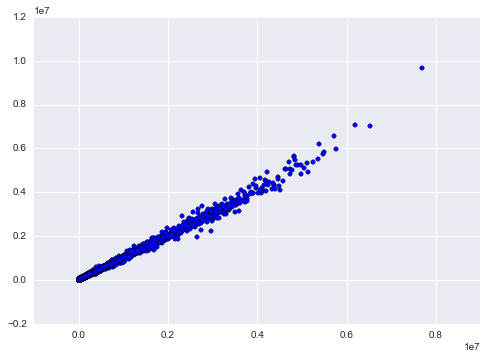

In [754]:
plt.scatter(new_datafram[1], new_datafram[5])

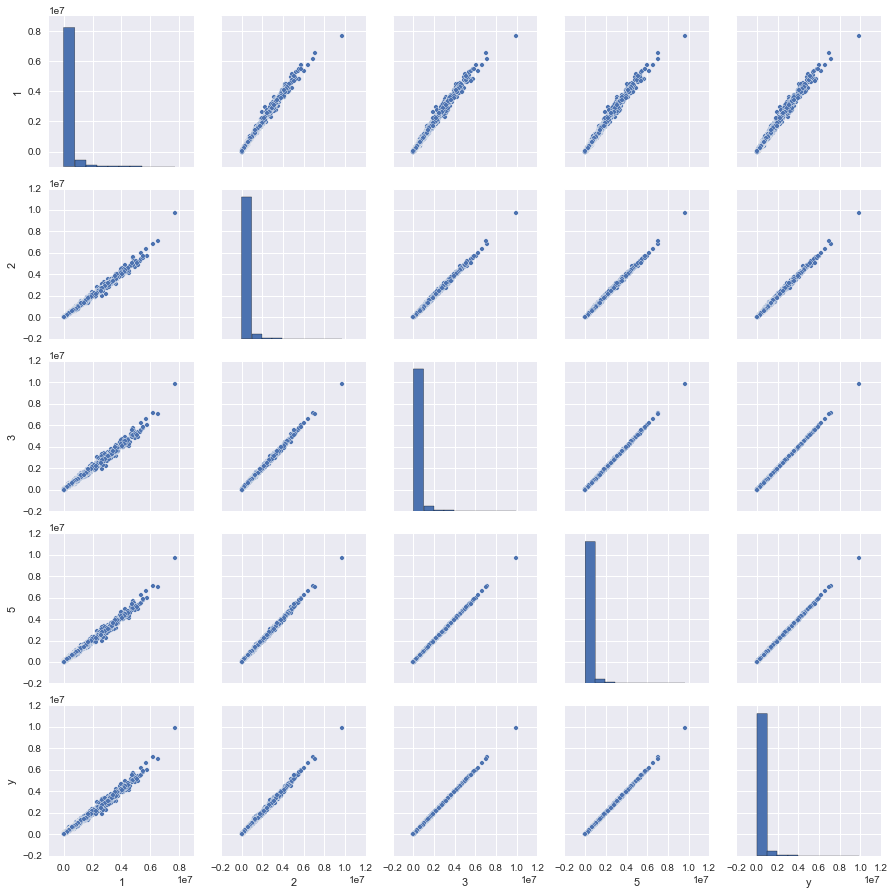

In [747]:
sns.pairplot(new_datafram)

In [532]:
ff = pd.DataFrame(final).sort_values(by=0)
ff


,0,1
0,348622.0,1496.463000
1,348623.0,27018.398100
2,348624.0,297393.862000
3,348625.0,29454.575500
4,348626.0,16.091000
5,348627.0,146160.989400
6,348628.0,67698.055200
7,348629.0,111879.113900
8,348630.0,102573.688600
9,348631.0,3540.020000


In [533]:
ff.columns = ['Num', 'y']

In [534]:
ff.Num = ff.Num.apply(int)

In [473]:
ff

,Num,y
0,348622,1496.463000
1,348623,27018.398100
2,348624,297393.862000
3,348625,29454.575500
4,348626,16.091000
5,348627,146160.989400
6,348628,67698.055200
7,348629,111879.113900
8,348630,102573.688600
9,348631,3540.020000


In [535]:
ff.to_csv('./rans_lin_mean.csv', index=False)

In [536]:
kk = pd.read_csv('./my_top_2_wout_knn_demand.csv')

In [537]:
diffs  = kk.join(ff, lsuffix='xx').drop('Num',axis=1)
diffs.head()

,Numxx,yxx,y
0,348622,1496.4630,1496.4630
1,348623,27018.3981,27018.3981
2,348624,297393.8620,297393.8620
3,348625,29454.5755,29454.5755
4,348626,16.0910,16.0910


In [538]:
diffs[diffs['y'] != diffs['yxx']]

,Numxx,yxx,y
2,348624,297393.862000,297393.862000
4,348626,16.091000,16.091000
20,348642,113163.175700,113163.175700
25,348647,150428.322600,150428.322600
29,348651,23589.406000,23589.406000
32,348654,7393.814500,7393.814500
37,348659,1399.917000,1399.917000
40,348662,7055.903500,7055.903500
41,348663,18488.559000,18488.559000
43,348665,79864.460300,79864.460300


add feature. mean for last 3 weeks

In [98]:
_new_train = deepcopy((train[~((train.year >= 2014) & (train.week >= 22))]))
_new_test = deepcopy(train[(train.year >= 2014) & (train.week >= 22)])

In [99]:
__new_te = _new_test[_new_test['shift'] == 1].drop(['shift'], axis=1)

In [100]:
__new_tr = _new_train[_new_train['shift'] == 1].drop(['shift'], axis=1)

In [101]:
__new_tr.drop(__new_tr.columns[-30:], axis=1, inplace=True)
__new_te.drop(__new_te.columns[-30:], axis=1, inplace=True)

In [102]:
__new_tr.drop(__new_tr.columns[-30:-14], axis=1, inplace=True)
__new_te.drop(__new_te.columns[-30:-14], axis=1, inplace=True)

In [103]:
from xgboost import XGBRegressor

In [ ]:
algo = XGBRegressor(
 learning_rate =0.1,
 n_estimators=250,
 max_depth=15,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1)
    
    
    
    
    
    
    
    
    
#     max_depth=20, n_estimators=400,min_child_weight=5)
algo.fit(__new_tr.drop(['y','Num', 'year'],axis=1),__new_tr['y'])
predictions_skl = algo.predict((__new_te.drop(['y','Num', 'year'], axis=1)))

get_smape(predictions_skl, __new_te['y'])


In [89]:
ttrainxgb = xgboost.DMatrix(__new_tr.drop(['y','Num', 'year'],axis=1), __new_tr['y'])
params = {"objective": "reg:linear", "booster":"gbtree"}
gdb = xgboost.train(dtrain=ttrainxgb, params=params)
# new_train.drop(['y','Num', 'year'],axis=1)
predictions = gdb.predict(xgboost.DMatrix(__new_te.drop(['y','Num', 'year'], axis=1)))

def get_smape(actual, forcasted):
    return 100. * np.mean(np.abs(actual - forcasted) / ((np.abs(actual) + np.abs(forcasted)) / 2.))


# algo = xgboost.train(dtrain=xgboost.DMatrix(new_train[new_train.item_id == 20442076].drop(['y','Num','year'],axis=1), new_train[new_train.item_id == 20442076]['y']), params=params)
# prd = algo.predict(xgboost.DMatrix(new_test[new_test.item_id == 20442076].drop(['y','Num', 'year'], axis=1)) )

In [83]:
def get_smape(actual, forcasted):
    return 100. * np.mean(np.abs(actual - forcasted) / ((np.abs(actual) + np.abs(forcasted)) / 2.))

In [499]:
get_smape(predictions, __new_te['y'])

34.164007100526035

In [91]:
len(_new_train)

50839

In [92]:
algo = XGBRegressor(max_depth=10, n_estimators=400,min_child_weight=5)
algo.fit(__new_tr.drop(['y','Num', 'year'],axis=1),__new_tr['y'])
predictions_skl = algo.predict((__new_te.drop(['y','Num', 'year'], axis=1)))

get_smape(predictions_skl, __new_te['y'])

31.444031051271843

In [93]:
get_smape(predictions_skl, __new_te['y'])

31.444031051271843

In [94]:
import sklearn.grid_search as sgrsrch

In [69]:
civi=(list(__new_tr.index), list(__new_te.index))

In [70]:
pararams = {
 'max_depth':range(3,20,2),
 'min_child_weight':range(1,10,2)
}

In [71]:
mygrid = sgrsrch.GridSearchCV(XGBRegressor(n_estimators=140), pararams, scoring=get_smape, cv=civi)

In [72]:
mygrid.fit(__new_tr.drop(['y','Num', 'year'],axis=1),__new_tr['y'])

ValueError: too many values to unpack

In [596]:
algo = XGBRegressor(
 learning_rate =0.1,
 n_estimators=400,
 max_depth=20,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1)
    
    
    
    
    
    
    
    
    
#     max_depth=20, n_estimators=400,min_child_weight=5)
algo.fit(__new_tr.drop(['y','Num', 'year'],axis=1),__new_tr['y'])
predictions_skl = algo.predict((__new_te.drop(['y','Num', 'year'], axis=1)))

get_smape(predictions_skl, __new_te['y'])

25.691188866299402

In [305]:
_new_train = deepcopy(newest_train)

In [306]:
__new_tr = _new_train[_new_train.Num <= 334004]
__new_te = _new_train[_new_train.Num > 334004]

In [307]:
len(_new_train) * 0.1

2483.0

In [308]:
___ntr = deepcopy(__new_tr)
___nte = deepcopy(__new_te)


In [309]:
# ___ntr = ___ntr[(___ntr.week >= 3) & (___ntr.week <= 50)]

In [310]:
# ___ntr.drop('item_id',axis=1, inplace=True)
# ___nte.drop('item_id',axis=1, inplace=True)

In [311]:
# ___ntr['y'] = ___ntr['y'].apply(lambda x: np.log(1 + x))
# ___nte['y'] = ___nte['y'].apply(lambda x: np.log(1 + x))

In [312]:
# ___ntr.drop(___ntr.columns[-30:-14], axis=1, inplace=True)
# ___nte.drop(___nte.columns[-30:-14], axis=1, inplace=True)

In [313]:
# ___ntr[___ntr.columns[-14:]]=___ntr[___ntr.columns[-14:]].apply(lambda x: np.log(1 + x))
# ___nte[___nte.columns[-14:]]=___nte[___nte.columns[-14:]].apply(lambda x: np.log(1 + x))

In [314]:
algo_0 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=170,
 max_depth=4,
 min_child_weight=1,
 gamma=0,
 subsample=.98,
 colsample_bytree=0.75,
 nthread=4,
 scale_pos_weight=1)
    
    
    
    
    
    
    
    
    
#     max_depth=20, n_estimators=400,min_child_weight=5)
algo_0.fit(___ntr.drop(['y','Num', 'year'],axis=1),___ntr['y'])
predictions_0 = algo_0.predict((___nte.drop(['y','Num', 'year'], axis=1)))

# get_smape(np.exp(predictions_skl) - 1, np.exp(___nte['y']) - 1)

In [330]:
algo_1 = RandomForestRegressor(n_estimators=140, max_depth=15)
algo_1.fit(___ntr.drop(['y','Num', 'year'],axis=1),___ntr['y'])
predictions_1 = algo_1.predict((___nte.drop(['y','Num', 'year'], axis=1)))

# get_smape(np.exp(predictions_skl) - 1, np.exp(___nte['y']) - 1)

In [316]:
algo_2 = GradientBoostingRegressor(max_depth=5, n_estimators=70)
algo_2.fit(___ntr.drop(['y','Num', 'year'],axis=1),___ntr['y'])
predictions_2 = algo_2.predict((___nte.drop(['y','Num', 'year'], axis=1)))

# get_smape(np.÷exp(predictions_skl) - 1, np.exp(___nte['y']) - 1)

In [317]:
algo_3 = ExtraTreesRegressor(n_estimators=140, max_depth=21)
algo_3.fit(___ntr.drop(['y','Num', 'year'],axis=1),___ntr['y'])
predictions_3 = algo_3.predict((___nte.drop(['y','Num', 'year'], axis=1)))

# get_smape(np.exp(predictions_skl) - 1, np.exp(___nte['y']) - 1)

In [318]:
algo_4 = BaggingRegressor(n_estimators=100)
algo_4.fit(___ntr.drop(['y','Num', 'year'],axis=1),___ntr['y'])
predictions_4 = algo_4.predict((___nte.drop(['y','Num', 'year'], axis=1)))

# get_smape(np.exp(predictions_skl) - 1, np.exp(___nte['y']) - 1)

In [319]:
daframka = pd.DataFrame()

In [320]:
daframka[1] = np.exp(predictions_1) - 1
daframka[2] = np.exp(predictions_2) - 1
daframka[3] = np.exp(predictions_3) - 1
daframka[4] = np.exp(predictions_4) - 1
daframka[5] = np.exp(predictions_0) - 1

In [321]:
daframka['y'] = (np.exp(___nte['y']) - 1).values

In [322]:
daframka

,1,2,3,4,5,y
0,28748.265025,31384.531343,29156.500030,29182.319610,33346.011719,29430.0000
1,353080.443523,358032.519436,354520.497405,353853.658848,368577.000000,413134.0000
2,34771.896887,37605.438063,35965.390213,32971.227656,38043.203125,35569.0000
3,92.798864,77.862443,91.553218,96.836185,69.359131,209.0000
4,112.953479,97.820308,93.477496,106.330980,68.774879,48.0000
5,172939.368072,164722.374787,170787.462491,177017.312270,177601.828125,148118.0000
6,127749.518128,109610.594025,121546.158160,127867.673016,126115.304688,98881.0000
7,87291.597882,89068.543255,89920.604775,81252.738256,87085.789062,85246.0000
8,96606.360505,101399.422023,94836.091396,92467.725070,95068.296875,86189.0000
9,2178.627682,2438.866411,2016.448058,2353.056820,2515.779053,3525.0000


In [323]:
from sklearn.linear_model import LassoLars

In [324]:
LassoLars()

LassoLars(alpha=1.0, copy_X=True, eps=2.2204460492503131e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)

In [325]:
from sklearn.neighbors import KNeighborsRegressor

In [194]:
# algo_0 = KNeighborsRegressor(weights='distance', p=4, n_neighbors=10)
# algo_0.fit(___ntr.drop(['y','Num', 'year'],axis=1),___ntr['y'])
# predictions_skl = algo_0.predict((___nte.drop(['y','Num', 'year'], axis=1)))

# get_smape(np.exp(predictions_skl) - 1, np.exp(___nte['y']) - 1)

48.89752115272935

In [116]:
algo = XGBRegressor(
 learning_rate =0.1,
 n_estimators=400,
 max_depth=20,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1)
    
    
    
    
    
    
    
    
    
#     max_depth=20, n_estimators=400,min_child_weight=5)
algo.fit(___ntr.drop(['y','Num', 'year'],axis=1),___ntr['y'])
predictions_skl = algo.predict((___nte.drop(['y','Num', 'year'], axis=1)))

get_smape(np.exp(predictions_skl) - 1, np.exp(___nte['y']) - 1)

22.813094376254032

In [131]:
algo = XGBRegressor(
 learning_rate =0.1,
 n_estimators=250,
 max_depth=15,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1)
    
    
    
    
    
    
    
    
    
#     max_depth=20, n_estimators=400,min_child_weight=5)
algo.fit(___ntr.drop(['y','Num', 'year'],axis=1),___ntr['y'])
predictions_skl = algo.predict((___nte.drop(['y','Num', 'year'], axis=1)))

get_smape(np.exp(predictions_skl) - 1, np.exp(___nte['y']) - 1)

22.599299664453643

In [ ]:
22.599299664453643
In [120]:


In [120]:
algo = XGBRegressor(
 learning_rate =0.1,
 n_estimators=140,
 max_depth=20,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1)
    
    
    
    
    
    
    
    
    
#     max_depth=20, n_estimators=400,min_child_weight=5)
algo.fit(__new_tr.drop(['y','Num', 'year'],axis=1),__new_tr['y'])
predictions_skl = algo.predict((__new_te.drop(['y','Num', 'year'], axis=1)))

get_smape(predictions_skl, __new_te['y'])

25.64649577033049

add new_feature

In [272]:
train[(train.item_id == 20442076) & (train['shift'] == 1)]

,Num,y,year,week,shift,item_id,f1,f2,f3,f4,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
0,0,123438,2012,52,1,20442076,4915.0,38056.0,40185.0,45733.0,...,39423.0,41765.0,52590.0,31452.0,44420.0,41865.0,52705.0,36102.0,44163.0,45239.0
698,3470,49217,2013,1,1,20442076,38056.0,40185.0,45733.0,59710.0,...,41765.0,52590.0,31452.0,44420.0,41865.0,52705.0,36102.0,44163.0,45239.0,76670.0
1394,6937,34819,2013,2,1,20442076,40185.0,45733.0,59710.0,39982.0,...,52590.0,31452.0,44420.0,41865.0,52705.0,36102.0,44163.0,45239.0,76670.0,30570.0
2083,10395,77143,2013,3,1,20442076,45733.0,59710.0,39982.0,45846.0,...,31452.0,44420.0,41865.0,52705.0,36102.0,44163.0,45239.0,76670.0,30570.0,21627.0
2787,13865,67781,2013,4,1,20442076,59710.0,39982.0,45846.0,43680.0,...,44420.0,41865.0,52705.0,36102.0,44163.0,45239.0,76670.0,30570.0,21627.0,47915.0
3470,17308,67306,2013,5,1,20442076,39982.0,45846.0,43680.0,48325.0,...,41865.0,52705.0,36102.0,44163.0,45239.0,76670.0,30570.0,21627.0,47915.0,42100.0
4170,20762,57592,2013,6,1,20442076,45846.0,43680.0,48325.0,42685.0,...,52705.0,36102.0,44163.0,45239.0,76670.0,30570.0,21627.0,47915.0,42100.0,41805.0
4870,24215,61601,2013,7,1,20442076,43680.0,48325.0,42685.0,40605.0,...,36102.0,44163.0,45239.0,76670.0,30570.0,21627.0,47915.0,42100.0,41805.0,35772.0
5564,27662,63194,2013,8,1,20442076,48325.0,42685.0,40605.0,44601.0,...,44163.0,45239.0,76670.0,30570.0,21627.0,47915.0,42100.0,41805.0,35772.0,38262.0
6258,31114,71711,2013,9,1,20442076,42685.0,40605.0,44601.0,41965.0,...,45239.0,76670.0,30570.0,21627.0,47915.0,42100.0,41805.0,35772.0,38262.0,39251.0


In [271]:
week_num = {2014:53, 2012:52, 2013:52}

In [289]:
from collections import defaultdict

In [296]:
data_for_product = defaultdict(dict)
for elem in tqdm(newest_train[['y', 'year', 'week', 'item_id']].values):
    if elem[1] in data_for_product[elem[3]]:
        data_for_product[elem[3]][elem[1]][elem[2]] = elem[0]
    else:
        data_for_product[elem[3]][elem[1]] = defaultdict(float)
        data_for_product[elem[3]][elem[1]][elem[2]] = elem[0]

100%|██████████| 24830/24830 [00:00<00:00, 419418.58it/s]


In [297]:
data_for_product[20427028.0]

{2012.0: defaultdict(float, {52.0: 340138.0}),
 2013.0: defaultdict(float,
             {1.0: 110776.0,
              2.0: 70915.0,
              3.0: 149741.0,
              4.0: 203508.0,
              5.0: 195400.0,
              6.0: 120347.0,
              7.0: 158134.0,
              8.0: 139039.0,
              9.0: 224751.0,
              10.0: 130197.0,
              11.0: 130978.0,
              12.0: 136408.0,
              13.0: 172295.0,
              14.0: 173432.0,
              15.0: 141436.0,
              16.0: 131322.0,
              17.0: 179917.0,
              18.0: 182912.0,
              19.0: 128690.0,
              20.0: 179672.0,
              21.0: 169438.0,
              22.0: 252132.0,
              23.0: 162155.0,
              24.0: 121835.0,
              25.0: 221498.0,
              26.0: 204339.0,
              27.0: 160360.0,
              28.0: 178243.0,
              29.0: 202063.0,
              30.0: 193745.0,
              31.0: 177829.0,
     

In [299]:
elem[2]

52.0

In [301]:
elem[1]

2012.0

In [306]:
data_for_product[elem[3]][elem[1]][int(elem[2] - 1)]

0.0

In [308]:
np.mean((data_for_product[elem[3]][elem[1]][int(elem[2] - 1)],
                               data_for_product[elem[3]][elem[1]][int(elem[2] - 2)],
                               data_for_product[elem[3]][elem[1]][int(elem[2] - 3)]))

0.0

In [328]:
new_feature = []
for elem in tqdm(newest_train[['y', 'year', 'week', 'item_id']].values):
    new_feature.append(np.mean((data_for_product[elem[3]][elem[1]][int(elem[2] - 1)],
                               data_for_product[elem[3]][elem[1]][int(elem[2] - 2)],
                               data_for_product[elem[3]][elem[1]][int(elem[2] - 3)])))

100%|██████████| 24830/24830 [00:00<00:00, 38120.75it/s]


In [312]:
newest_train['lst3mean'] = new_feature

In [316]:
mb_new = newest_train[(newest_train.week >= 4) & (newest_train.year != 2012)]

In [318]:
newest_test

,Num,year,week,item_id,f1,f2,f3,f4,f5,f6,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
1353,350866,2015,4.0,20443944,1853.0,2836.0,2807.0,2550.0,3951.0,3398.0,...,30.0,50.0,20.0,20.0,30.0,0.0,0.0,0.0,10.0,10.0
1505,351018,2015,4.0,20433851,200.0,380.0,150.0,230.0,220.0,210.0,...,20.0,80.0,50.0,30.0,80.0,270.0,130.0,30.0,70.0,120.0
1506,351019,2015,4.0,20427396,170.0,380.0,280.0,230.0,80.0,50.0,...,100.0,20.0,20.0,20.0,110.0,330.0,290.0,160.0,0.0,90.0
1523,351036,2015,4.0,20439005,29.0,20.0,20.0,0.0,105.0,30.0,...,20.0,0.0,10.0,15.0,0.0,30.0,5.0,0.0,15.0,20.0
1524,351037,2015,4.0,20439124,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1551,351064,2015,4.0,20438687,16860.0,17080.0,16750.0,16190.0,17765.0,15327.0,...,1560.0,1190.0,280.0,250.0,90.0,40.0,40.0,0.0,40.0,120.0
1552,351065,2015,4.0,20438688,22213.0,23991.0,18690.0,20385.0,20875.0,23756.0,...,470.0,100.0,100.0,40.0,50.0,0.0,0.0,0.0,20.0,160.0
1796,351309,2015,5.0,20447972,191280.0,164860.0,215995.0,236650.0,169852.0,175130.0,...,124030.0,114320.0,125180.0,130750.0,171420.0,125780.0,38247.0,121600.0,111050.0,151326.0
1797,351310,2015,5.0,20443057,57467.0,57560.0,59995.0,60706.0,60859.0,58645.0,...,41020.0,37525.0,34888.0,41300.0,47174.0,50700.0,10225.0,36755.0,34160.0,38721.0
1798,351311,2015,5.0,20447919,1830.0,2030.0,2000.0,2401.0,1400.0,1640.0,...,1769.0,2330.0,1269.0,1010.0,2193.0,1810.0,424.0,1359.0,1210.0,1180.0


In [323]:
elem[2]

20439124.0

In [330]:
new_test_feat = []
for elem in tqdm(newest_test[['year', 'week', 'item_id']].values):
    if elem[0] not in data_for_product[elem[2]]:
        new_test_feat.append(0)
    else:
        new_test_feat.append(np.mean((data_for_product[elem[2]][elem[0]][int(elem[1] - 1)],
                               data_for_product[elem[2]][elem[0]][int(elem[1] - 2)],
                               data_for_product[elem[2]][elem[0]][int(elem[1] - 3)])))

100%|██████████| 227/227 [00:00<00:00, 27828.81it/s]


In [332]:
newest_test['lst3mean'] = new_test_feat

#  Поч такой simple submission

In [258]:
198575.912031

198575.912031

In [261]:
train.y.mean()

198575.91203058365

In [263]:
round(train.y.mean(),6)

198575.912031

In [355]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DecisionTreeRegressor()

In [359]:
from sklearn.neighbors import KNeighborsRegressor

In [362]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [363]:
from sklearn.ensemble import ExtraTreesRegressor

In [391]:
from sklearn.ensemble import BaggingRegressor